# Discretized Hamiltonian

We compute here the eigenvalues $\varepsilon_n$ and eigenfunctions $\psi_n(z)$ of an MTI slab which is infinitely extended along the in-plane directions $x$ and $y$ and which has a finite thickness $d$ along the out-of-plane direction $z$.
The three-dimensional MTI Hamiltonian can be decomposed as 
$$
    h_{MTI} = A \partial^2_z + B \partial_z + C \,, 
$$
where the derivative part is 
$$
	A = 
	\begin{bmatrix}
		(B_1-D_1) & 0 & 0 & 0 \\[5pt]
		%
		0 & (B_1-D_1) & 0 & 0 \\[5pt]
		%
		0 & 0 & -(B_1+D_1) & 0 \\[5pt]
		%
		0 & 0 & 0 & -(B_1+D_1)
	\end{bmatrix} \,,
    \qquad
	B = 
	\begin{bmatrix}
		0 & 0 & -i A_1 & 0 \\[5pt]
		%
		0 & 0 & 0 & i A_1  \\[5pt]
		%
		-i A_1 & 0 & 0 & 0 \\[5pt]
		%
		0 & i A_1 & 0 & 0 
	\end{bmatrix} \,,     
$$
and the constant term is given by
$$
    C =  
	\begin{bmatrix}
		\varepsilon_0 + \mu_0 + \Lambda & 0 & 0 & A_2 k_-\\[5pt]
		%
		0 & \varepsilon_0 + \mu_0 - \Lambda & A_2 k_+ & 0 \\[5pt]
		%
		0 & A_2 k_- & \varepsilon_0 - \mu_0 + \Lambda & 0 \\[5pt]
		%
		A_2 k_+ & 0 & 0 & \varepsilon_0 - \mu_0 - \Lambda \\[5pt]
	\end{bmatrix} \,.
$$
In the basis of states $\{ \ket{+,\uparrow}, \ket{+,\downarrow}, \ket{-,\uparrow}, \ket{-,\downarrow} \}$, the three matrices $A,B$ and $C$ can be expressed as
$$
\begin{gathered}
    A = B_1 \lambda_z \sigma_0 - D_1 \lambda_0 \sigma_0 \,, \\[5pt]
    %
    B = -i A_1 \lambda_x \sigma_z \,, \\[5pt]
        %
    C = \epsilon_0 \lambda_0 \sigma_0 + \Lambda \lambda_0 \sigma_z + A_2 \left( k_x \lambda_x  \sigma_x + k_y \lambda_x  \sigma_y \right) + \mu_0 \lambda_z \sigma_0 \,,
\end{gathered}
$$
where $\lambda_{x,y,z}$ and $\sigma_{x,y,z}$ are Pauli matrices acting in the parity and spin subspaces, respectively.

In [1]:
import numpy as np

# Hamiltonian parameters
params=dict(C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6)

# Set of Pauli matrices for spin
sigma0 = np.array([[1, 0], [0, 1]])
sigmaX = np.array([[0, 1], [1, 0]])
sigmaY = np.array([[0, -1j], [1j, 0]])
sigmaZ = np.array([[1, 0], [0, -1]])


# Set of Pauli matrices for pseudo-spin
lambda0 = np.array([[1, 0], [0, 1]])
lambdaX = np.array([[0, 1], [1, 0]])
lambdaY = np.array([[0, -1j], [1j, 0]])
lambdaZ = np.array([[1, 0], [0, -1]])


# Function defining the Matrices A,B,C
def ABCmat(kx, ky, L, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6):

    k = np.sqrt(kx**2+ky**2); e0 = C + D2*k**2; m0 = M - B2*k**2

    #matrix A
    Amat = B1*np.kron(lambdaZ, sigma0) - D1*np.kron(lambda0, sigma0)

    # matrix B
    Bmat = -1j*A1*np.kron(lambdaX, sigmaZ)

    # matrix C
    Cmat = e0*np.kron(lambda0, sigma0) + L*np.kron(lambda0, sigmaZ) + A2*(kx*np.kron(lambdaX, sigmaX) + ky*np.kron(lambdaX, sigmaY)) + m0*np.kron(lambdaZ, sigma0)

    return [Amat,Bmat,Cmat]


# Function building the 3D MTI Hamiltonian from A,B,C
def hMTI(kx, ky, kz, L, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6):

    # build A,B,C matrices
    [Amat, Bmat, Cmat] = ABCmat(kx, ky, L, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2)

    return -np.power(kz,2)*Amat + 1j*kz*Bmat + Cmat

Using the *finite difference approximations*, the spatial derivatives of the wavefunction $\psi \equiv \psi(z)$ can be approximated in the following way

- $ \partial_z f(z) \approx \bigl\lbrack f(z + \Delta z) − f(z − \Delta z) \bigr\rbrack / 2 \Delta z $, 

- $ \partial^2_z f(z) \approx \bigl\lbrack f(z + \Delta z) - 2f(z) + f(z − \Delta z) \bigr\rbrack / \Delta z^2 $,	

and the energy eigenvalue problem $h_{MTI} \psi = E \psi$ becomes
$$
\begin{split}
    h_{MTI} \psi(z) &= \Bigl\lbrack A \partial^2_z + B \partial_z + C \Bigr\rbrack \psi(z) = \\[5pt]
    %
    &= 
    A \frac{1}{\Delta z^2} 
    \Bigl\lbrack \psi(z + \Delta z) - 2\psi(z) + \psi(z − \Delta z) \Bigr\rbrack 
    +
    B \frac{1}{2 \Delta z}
    \Bigl\lbrack \psi(z + \Delta z) - \psi(z − \Delta z) \Bigr\rbrack 
    +
    C \psi(z) = \\[5pt]
    %
    &=
    \Bigl\lbrack \frac{A}{\Delta z^2} + \frac{B}{2 \Delta z} \Bigr\rbrack
    \psi(z + \Delta z)
    +
    \Bigl\lbrack C - \frac{2 A}{\Delta z^2} \Bigr\rbrack
    \psi(z)
    +
    \Bigl\lbrack \frac{A}{\Delta z^2} - \frac{B}{2 \Delta z} \Bigr\rbrack
    \psi(z - \Delta z) 
    =
    E \psi(z) \,.
\end{split}
$$
We can thus write the following equation for the confined problem based on the previous approximation
$$
\begin{equation}
    h_- \psi((n-1)\Delta z) + h_0 \psi (n \Delta z) +  h_+ \psi ((n+1)\Delta z) = E \psi (n \Delta z) \,,
\end{equation}
$$
where we can recognize a tight-binding problem with on-site energy $h_0$ and hopping terms  $h_\pm$ given by 
$$
    h_0 = C - \frac{2 A}{\Delta z^2} \,,
    \qquad
    h_\pm = \frac{A}{\Delta z^2} \pm \frac{B}{2 \Delta z} \,.
$$ 

Given $N+1$ lattice points with spacing $\Delta z$ along the out-of-plane direction $z$ and assuming *Neuman* boundary conditions at the extremities, we have that
$$
\begin{equation}
    \partial_z \psi (z) \Biggl|_{z=0} = \partial_z \psi (z) \Biggl|_{z=0} = 0 \,,
\end{equation}
$$
which using the finite difference approximation leads to 
$$
\begin{equation}
    \partial_z \psi (z) \Biggl|_{z=0} \approx 
    \frac{1}{2\Delta z} 
    \Bigl\lbrack \psi(\Delta z) - \psi(-\Delta z)  \Bigr\rbrack = 0 \,,
    \qquad
    \implies
    \psi(\Delta z) = \psi(-\Delta z) \,,
\end{equation}
$$
and 
$$
\begin{equation}
    \partial_z \psi (z) \Biggl|_{z=d} \approx 
    \frac{1}{2\Delta z} 
    \Bigl\lbrack \psi(N+\Delta z) - \psi(N-\Delta z)  \Bigr\rbrack = 0 \,,
    \qquad
    \implies
    \psi(N+\Delta z) = \psi(N-\Delta z) \,.
\end{equation}
$$
Applying such conditions, we can express the wavefunctions at the lattice points $z=-\Delta z$ and $z=N+\Delta z$ in terms of the wavefunctions inside the lattice at $z=\Delta z$ and $z=N-\Delta z$.
The equations for the two interfaces thus become
$$
\begin{equation} 
    h_0 \psi (0)
    + \biggl\lbrack h_+ + h_- \biggr\rbrack \psi(\Delta z) 
    = E \psi (0) \,,
\end{equation}
$$
for $z=0$ and
$$
\begin{equation}
    \biggl\lbrack h_+ + h_- \biggr\rbrack \psi((N-1)\Delta z) 
    + h_0 \psi (N \Delta z) = E \psi (N \Delta z) \,,
\end{equation}
$$
for $z=N$.
Defining a discretized wavefunction on the lattice $$
    \Psi = 
    \begin{bmatrix}
    \psi(0) & \psi(\Delta z) & \dots & \psi(N \Delta z) 
    \end{bmatrix}^T \,,
$$
the energy eigenvalue problem can finally be rewritten as $H \Psi = E \Psi$ where 
$$
    H =
    \begin{bmatrix}
    h_0 & \textcolor{red}{h_{int}} & 0 & \dots & & & 0 \\[5pt]
    %
    \textcolor{red}{h_-} & h_0 & h_+ & 0 & \dots & & 0 \\[5pt]
    %
    0 & h_- & h_0 & h_+ & 0 & \dots & 0 \\[5pt]
    %
    \vdots & & & & & & \vdots \\[5pt]
    %
    0 & \dots & 0 & h_- & h_0 & h_{int} & 0 \\[5pt]
    %
    0 & & \dots & 0 & h_- & h_0 & \textcolor{red}{h_+} \\[5pt]
    %
    0 & & & \dots & 0 & \textcolor{red}{h_{int}} & h_0
    \end{bmatrix} \,,
$$
where we defined $h_{int} = h_+ + h_-$.
It is worth noting that we enforce the hermiticity of the tight-binding matrix, symmetrixing the hoppings at the interfaces and observing that $h_{int}^\dagger = h_{int}$.

In [2]:
from numpy.linalg import eig, eigh, matrix_rank

from scipy.sparse import bmat
from scipy.linalg import ishermitian


# Build the tigh-binding hamiltonian (Nlat=lattice points, dZ=lattice spacing)
def TBham(Nlat, dZ, kx, ky, L, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6):

    # build A,B,C matrices
    [Amat, Bmat, Cmat] = ABCmat(kx, ky, L, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2)

    # on-site energy
    onsite = Cmat - 2./np.power(dZ,2)*Amat;

    # hopping energy
    hopping_plus = 1./np.power(dZ,2)*Amat + 1./(2.*dZ)*Bmat

    # hopping minus
    hopping_minus = 1./np.power(dZ,2)*Amat - 1./(2.*dZ)*Bmat

    # hopping at the interfaces
    hopping_int = hopping_plus + hopping_minus
    

    # define a zero tight-binding matrix
    TBmat = [ [None for _ in range(Nlat) ] for _ in range(Nlat)]
		
	# populate the tight-binding matrix
    for i in range(Nlat):
		
        # onsite diagonal energy 
        TBmat[i][i] = onsite
        # hopping energy (n+1)
        if i+1 < Nlat: TBmat[i][i+1] = hopping_plus
        # hopping energy (n-1)
        if i-1 > -1: TBmat[i][i-1] = hopping_minus

    # modify the hoppings at the interface z=0
    TBmat[0][1] = hopping_int; #TBmat[1][0] = hopping_int;
    
    # modify the hoppings at the interface z=d
    TBmat[Nlat-1][Nlat-2] = hopping_int; #TBmat[Nlat-2][Nlat-1] = hopping_int; 

    return bmat(TBmat)



# Compute energy and wavefunctions in the MTI slab
def eigenstates(Nlat, dZ, kx, ky, L, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6):

    # thickness 
    d = (Nlat-1)*dZ
    # lattice
    lattice = np.linspace(0., d, num=Nlat)
    
    # build the tight-binding matrix
    tb = TBham(Nlat, dZ, kx, ky, L, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2)

    # get rank of TB matrix
    rank = matrix_rank(tb.toarray())
    print(rank, tb.toarray().shape)
    
    #print(ishermitian(tb.toarray()))
    # solve the tight-binding problem
    if ishermitian(tb.toarray()) is True:
        # print rank of TB matrix
        #rank = matrix_rank(tb.toarray()); print(rank, tb.toarray().shape)
        # compute energy spectrum
        egval, egvec = eigh(tb.toarray())
    else:
        egval, egvec = eig(tb.toarray())
    
    # indices sorted by absolute value
    idx_sort = np.argsort(np.abs(egval)) 
    # reorder egval 
    egval = egval[idx_sort]
    # reorder egvec 
    egvec = [egvec[:, idx] for idx in idx_sort]

    # wavefunctions as spinors
    spinors = np.array([[ egv[4*ilat:4*ilat+4] for ilat in range(Nlat)] for egv in egvec])
    
    # loop over eigenstates 
    for iegv in range(len(egval)):

        # probability density for each lattice point
        pd = np.array([np.vdot(s, s) for s in spinors[iegv]]).real
        # normalization
        norm = np.trapz(pd, x=lattice)
        # normalize spinors over lattice
        spinors[iegv] = np.divide(spinors[iegv], np.sqrt(norm))

    return lattice, egval, spinors



# lattice
Nlat = 250; d = 100.; dZ = d/(Nlat-1)
# eigenstates
lattice, egval, spinors = eigenstates(Nlat=Nlat, dZ=dZ, kx = 0., ky = 0., L = 0.)

1000 (1000, 1000)


## <font> **Eigenstates and Eigenenergies** </font> 

### <font>Full Wavefunction </font> 


We plot here the probability density $|\psi_n(z)|^2$, where the wavefunction $\psi_n(z)$ is given by the 4-components spinor
$$
\psi_n(z) = 
\begin{pmatrix}
    \psi_{n, \, \uparrow +} (z) &
    \psi_{n, \, \downarrow +} (z) &
    \psi_{n, \, \uparrow -} (z) &
    \psi_{n, \, \downarrow -} (z) 
\end{pmatrix}^T \,,
$$
where $n$ is a discrete quantum number which label the discrete states in the finite system..
The wavefunction is indeed obtained assuming an MTI slab with thickness $d = N_{lat} \, \Delta z$, where $N_{lat}$ is the number of lattice points along the $z$ direction and $\Delta z$ is the spacing between them.
In the following, the wavefunctions are normalized such that 
$$
    \int_0^d dz \, |\psi_n(z)|^2 = 1 \,.
$$

#### <font color='green'> **Eigenvalues** </font> 

Energy eigenvalues: [ 0.02959949  0.02959949  0.02960051  0.02960051  0.2732      0.2732
  0.27407375  0.27407375 -0.28045461 -0.28045461  0.28057389  0.28057389]



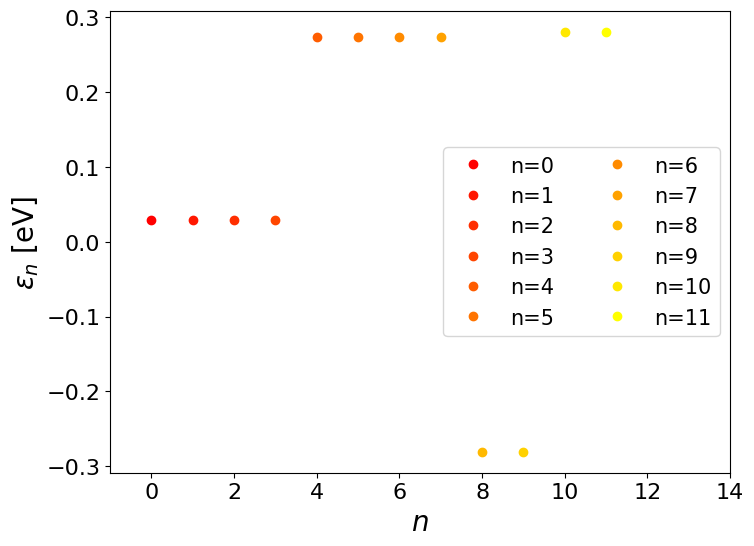

In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# eigenvalues to plot
n = 12
# colors
cmap = plt.get_cmap('autumn', n)
# figure
fig, ax = plt.subplots(1,1, figsize=(8, 6))

# energies 
print('Energy eigenvalues: ' + str(egval[0:n].real) + '\n')

# loop over eigenvalues
for iegv in range(n):

    # plot energy
    ax.plot(iegv, egval[iegv].real, 'o', label='n=' + str(iegv), c=cmap(iegv));

ax.legend(fontsize=15, ncol=2, loc='center right')
ax.set_xlim(-1, n+2)
ax.set_xlabel('$n$', fontsize = 20)
ax.set_ylabel('$\epsilon_n$ [eV]', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=16);

#### <font color='green'> **Probability Density** </font> 

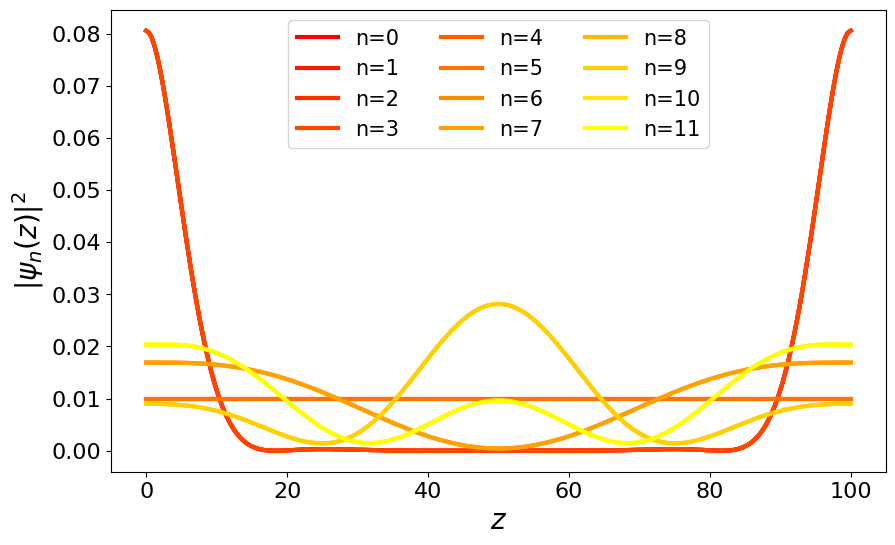

In [13]:
# figure
fig, ax = plt.subplots(1,1, figsize=(10, 6))

# loop over eigenvalues
for iegv in range(n):

    # probability density for each lattice point
    probdens = np.array([np.vdot(s, s) for s in spinors[iegv]]).real

    # plot probability density
    ax.plot(lattice, probdens, label='n=' + str(iegv), lw=3, c=cmap(iegv))

    #ax.axvline(x=10, color='black', ls=':')
 
    # normalization
    #print(iegv, np.trapz(probdens, x=lattice))


ax.legend(fontsize=15, loc='upper center', ncol=3)
ax.set_xlabel('$z$', fontsize = 20)
ax.set_ylabel('$|\psi_n(z)|^2$', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=16);

#### <font color='green'> **MTI Components** </font> 

Energy eigenvalues: [ 0.02959949  0.02959949  0.02960051  0.02960051  0.2732      0.2732
  0.27407375  0.27407375 -0.28045461 -0.28045461  0.28057389  0.28057389]



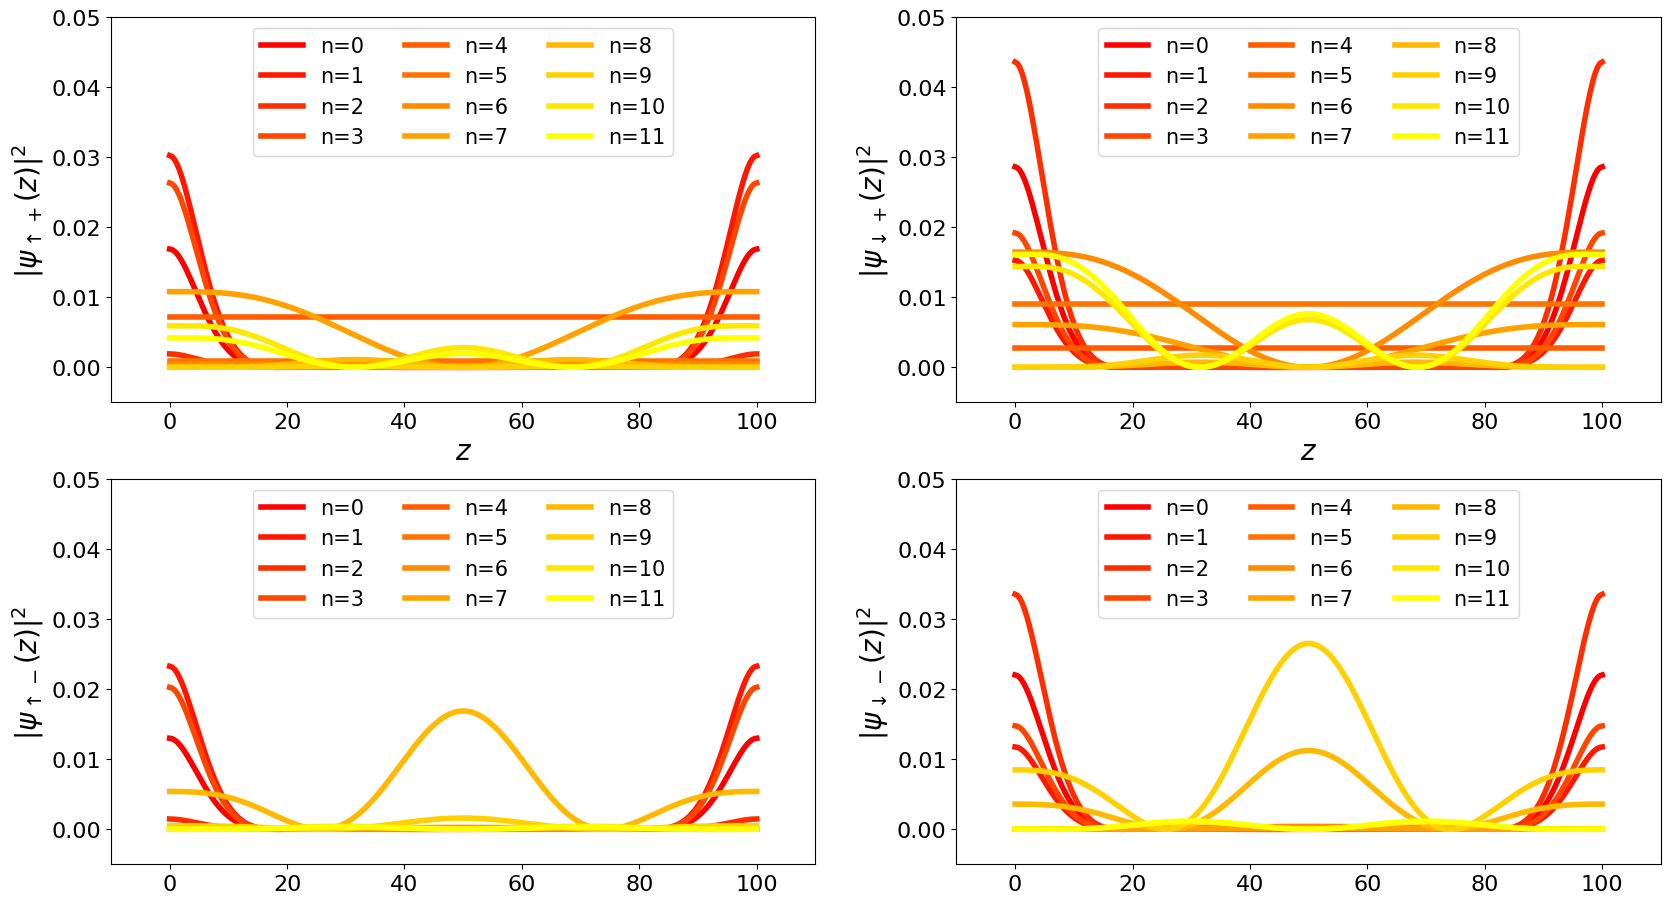

In [9]:
# eigenvalues to plot
n = 12
# colors
cmap = plt.get_cmap('autumn', n)
# figure
fig, ax = plt.subplots(2,2, figsize=(20, 11))

for icomp in range(4):

    if icomp == 0: iPic = 0; jPic = 0
    if icomp == 1: iPic = 0; jPic = 1
    if icomp == 2: iPic = 1; jPic = 0
    if icomp == 3: iPic = 1; jPic = 1
        

    # plot MTI interfaces
    ax[iPic][jPic].axvline(x=lattice[100]-100, ls='--', color='black'); ax[iPic][jPic].axvline(x=lattice[200]-100, ls='--', color='black')

    # loop over eigenstates
    for iegv in range(n):

        # probability density 
        probdens = np.array([[ s[icomp]*np.conjugate(s[icomp]) for icomp in range(4)] for s in spinors[iegv]]).real        
        # plot probability density in MTI
        ax[iPic][jPic].plot(lattice, probdens[:,icomp], label='n=' + str(iegv), lw=4, c=cmap(iegv))

    if iPic == 0: 
        ax[iPic][jPic].set_xlabel('$z$', fontsize = 20)
        
    ax[iPic][jPic].set_xlim(-10., 110.)
    ax[iPic][jPic].set_ylim(-0.005, 0.05)
    ax[iPic][jPic].legend(fontsize=15, loc='upper center', ncol=3)
    ax[iPic][jPic].tick_params(axis='both', which='major', labelsize=16);


ax[0][0].set_ylabel('$|\psi_{\\uparrow +}(z)|^2$', fontsize = 20);
ax[0][1].set_ylabel('$|\psi_{\downarrow +}(z)|^2$', fontsize = 20);
ax[1][0].set_ylabel('$|\psi_{\\uparrow -}(z)|^2$', fontsize = 20);
ax[1][1].set_ylabel('$|\psi_{\downarrow -}(z)|^2$', fontsize = 20);

# energies 
print('Energy eigenvalues: ' + str(egval[0:n].real) + '\n')

### <font> Completeness </font> 

Below, we check that the states $\psi_{n, \, \sigma\lambda}(z)$ satisfies the *completeness relation*.
Recalling that $\psi_{n, \, \sigma\lambda}(z) = \braket{ z \sigma \lambda | n }$ we can write explicitly
$$
    \braket{ z \sigma \lambda | z' \sigma' \lambda' }
    =
    \sum_{n} \braket{ z \sigma \lambda | n } \braket{ n | z' \sigma' \lambda' }
    =
    \sum_{n} \psi_{n, \, \sigma \lambda}(z) \psi^\star_{n, \, \sigma' \lambda'}(z')
    =
    \delta_{\sigma \sigma'} \delta_{\lambda \lambda'} \delta(z-z') \,.
$$

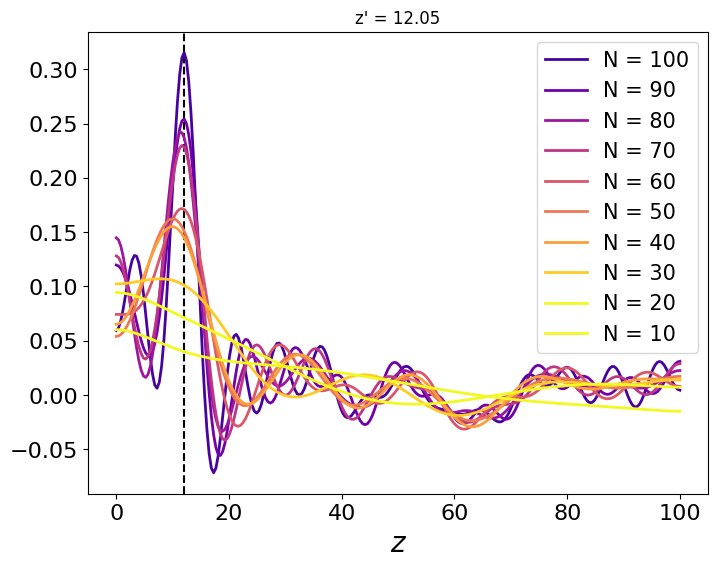

In [10]:
# iterations on eigenstates
N = np.arange(start=10, stop=101, step=10)

# figure
fig, ax = plt.subplots(1,1, figsize=(8,6))
# colors
cmap = plt.get_cmap('plasma', len(N))
# titles
title = ['$\sigma=\\uparrow, \lambda=+$', '$\sigma=\downarrow, \lambda=+$', '$\sigma=\\uparrow, \lambda=-$','$\sigma=\downarrow, \lambda=-$']

# z' position (between 0 and Nlat)
X = 30; ax.axvline(x=lattice[X], c='black', ls='dashed')

# spin lambda components
icomp = 1; jcomp = 1;

# loop over states
for idx in range(1,len(N)+1):

    # number of states
    Negv = N[-idx]
    # compute psi(x).psi^\star (x')
    delta = np.array([ np.sum([ spinors[iegv][x][icomp]*np.conj(spinors[iegv][X][jcomp]) for iegv in range(Negv)]) for x in range(Nlat) ])
    
    # plot the function on lattice
    ax.plot(lattice, delta.real, lw=2, c=cmap(idx), label='N = ' + str(Negv))

ax.set_title('z\' = ' + str(round(lattice[X],2)))
ax.legend(fontsize=15)
ax.set_xlabel('$z$', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=16);

### <font> Orthonormality </font> 

Similarly, we can check that the energy states $\ket{n}$ are *orthonormal*, meaning that
$$
    \braket{ n | n'} = \sum_{\sigma\lambda} \int dz \, 
    \psi_{n, \, \sigma\lambda}^\star(z) \psi_{n', \, \sigma\lambda}(z)
    =
    \delta_{nn'}\,,
$$

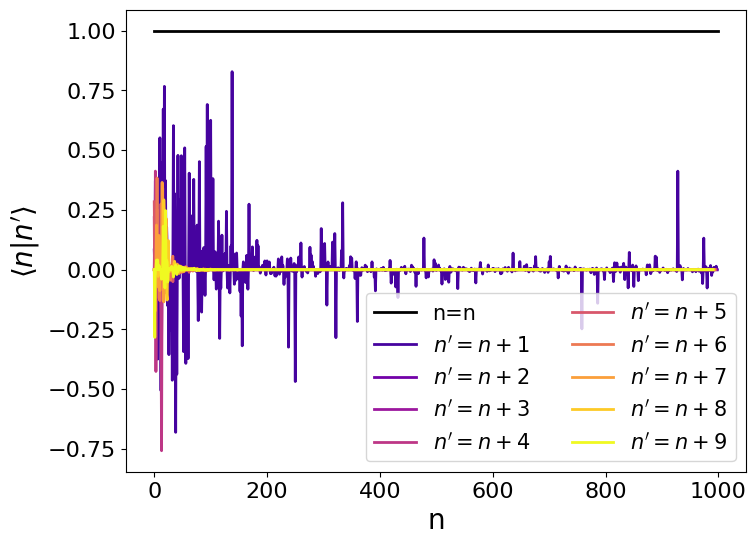

In [11]:
# iteration
N = 10

# figure
fig, ax = plt.subplots(1,1, figsize=(8,6))
# colors
cmap = plt.get_cmap('plasma', N)

# diagonal product
deltann = np.array([ np.trapz( [np.vdot(s[iLat], s[iLat]) for iLat in range(Nlat)], x=lattice ) for s in spinors])
# plot diagonal product
ax.plot( np.arange(len(egval)), deltann.real, label='n=n', lw=2, c='black')

for idx in range(1,N,1):

    # off-diagonal product
    deltanm = np.array([ np.trapz( [np.vdot(spinors[iegv][iLat], spinors[iegv+idx][iLat]) for iLat in range(Nlat)], x=lattice ) for iegv in range(len(egval)-idx)])
    
    # label
    label = '$n\'=n + $' + str(idx) 
    # plot off-diagonal product
    ax.plot( np.arange(len(egval)-idx), deltanm.real, label=label, lw=2, c=cmap(idx))


ax.set_xlabel('n', fontsize = 20)
ax.set_ylabel('$\langle n | n\' \\rangle$', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.legend(fontsize=15, ncol=2);

### <font> **Green's Function** </font> 

The goal here is to compute the time-ordered (in real time) Green's function $\mathcal{G}^{(0)}_{MTI}$ using the wavefunctions $\psi_{n, \, \sigma\lambda}$ previously obtained by discretizing the 3D MTI Hamiltonian $h_{MTI}$ on a finite lattice along the $z$ direction.
In an MTI slab with a finite thickness $d$ along $z$ and translational invariance along $x$ and $y$, the real-time Green's function is given by
$$
    \newcommand{\T}{\hat{T}_t \,}
	\mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') =
	-i \left\langle
	\T \hat{\psi}_{\sigma \lambda}(zt) \hat{\psi}^\dagger_{\sigma' \lambda'}(z't')
	\right\rangle_0 \,,
$$
where $\hat{\psi}^\dagger_{\sigma \lambda}(zt)$ $(\hat{\psi}_{\sigma \lambda}(zt))$ creates (annihilates) an electron with spin $\sigma$ and parity $\lambda$ at position $z$ and time $t$.
Here, $\langle \dots \rangle_0$ indicates that the average is on the unperturbed ground state.
For the sake of clarity, we omitted the indices for the in-plane wavenumbers $k_x$ and $k_y$.
Writing explicitly the time-evolution in the Heisenberg picture, the field operators can be expanded in terms of the wavefunctions $\psi_{n, \, \sigma\lambda}$ as
$$
    \hat{\psi}_{\sigma \lambda}(zt) = 
    \sum_{n=0}^{+\infty} e^{-i \epsilon_n t /\hbar} \psi_{n, \, \sigma\lambda}(z) \hat{c}_{n} \,,
    \qquad
    \hat{\psi}^\dagger_{\sigma \lambda}(zt) = 
    \sum_{n=0}^{+\infty} e^{i \epsilon_n t/\hbar} \psi_{n, \, \sigma\lambda}^\star(z) \hat{c}^\dagger_{n} \,,
$$
where $\hat{c}^\dagger_{n}$ $(\hat{c}_{n})$ is the creation (annihilation) operator for an electron in the quantum state $\ket{n}$.
Making explicit the action of the time-ordering operator, the Green's function takes the following form
$$
    \mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') =
	-i \theta(t-t') \left\langle  \hat{\psi}_{\sigma \lambda}(zt) \hat{\psi}^\dagger_{\sigma' \lambda'}(z't') \right\rangle_0
     +
     i \theta(t'-t) \left\langle \hat{\psi}^\dagger_{\sigma' \lambda'}(z't') \hat{\psi}_{\sigma \lambda}(zt) \right\rangle_0 \,.
$$
The first term in the previous equation can be rewritten as
$$
\begin{split}
    \left\langle \hat{\psi}_{\sigma \lambda}(zt) \hat{\psi}^\dagger_{\sigma' \lambda'}(z't') \right\rangle_0
    &=
    \sum_{n m} 
    e^{-i \left( \epsilon_n t - \epsilon_{m} t' \right)/\hbar } 
    \psi_{n, \, \sigma\lambda}(z) \psi_{m, \, \sigma'\lambda'}^\star(z') 
    \left\langle \hat{c}_{n} \hat{c}^\dagger_{m} \right\rangle_0 = \\[5pt]
    %%%
    &=
    \sum_{n m} 
    e^{-i \left( \epsilon_n t - \epsilon_{m} t' \right)/\hbar } 
    \psi_{n, \, \sigma\lambda}(z) \psi_{m, \, \sigma'\lambda'}^\star(z') 
    \left\langle 
        \delta_{nm} -
        \hat{c}^\dagger_{m} \hat{c}_{n} 
    \right\rangle_0 = \\[5pt]
    %%%
    &=
    \sum_{n m} \delta_{nm}
    e^{-i \left( \epsilon_n t - \epsilon_{m} t' \right)/\hbar } 
    \psi_{n, \, \sigma\lambda}(z) \psi_{m, \, \sigma'\lambda'}^\star(z') 
    \left\langle 
        1 -
        \hat{c}^\dagger_{n} \hat{c}_{n} 
    \right\rangle_0 = \\[5pt]
    %%%
    &= \sum_{n} 
    e^{-i \epsilon_n \left( t-t' \right)/\hbar } 
    \psi_{n, \, \sigma\lambda}(z) \psi_{n, \, \sigma'\lambda'}^\star(z') 
    \left\langle 
        1 -
        \hat{n}_{n}
    \right\rangle_0 \,,
\end{split}
$$
where in the third row we observed that the average in the unperturbed ground state is nonzero only if the operators $\hat{c}_{n}$ and $\hat{c}^\dagger_{m}$ act on the same quantum state, i.e.
$$
    \left\langle \delta_{nm} - \hat{c}^\dagger_{m} \hat{c}_{n} \right\rangle_0 
    =
    \delta_{nm}  \left\langle 1 - \hat{c}^\dagger_{n} \hat{c}_{n} \right\rangle_0 \,.
$$
Similarly, the second term in the Green's function expansion can be expressed as
$$
    \left\langle  \hat{\psi}^\dagger_{\sigma' \lambda'}(z't') \hat{\psi}_{\sigma \lambda}(zt) \right\rangle_0
    = \sum_{n} 
    e^{-i \epsilon_n \left( t-t' \right)/\hbar } 
    \psi_{n, \, \sigma\lambda}(z) \psi_{n, \, \sigma'\lambda'}^\star(z') 
    \left\langle 
        \hat{n}_{n}
    \right\rangle_0 \,.
$$
Here, $\hat{n}_{n} \equiv \hat{c}^\dagger_{n} \hat{c}_{n}$ is the number operator which counts the number of electrons in the state $\ket{n}$.
For non-interacting fermions its average value is given by the Fermi-Dirac distribution
$$
    \left\langle \hat{n}_{n} \right\rangle_0
    =
    \frac{1}{e^{\beta(\epsilon_n-E_F)} + 1} \,,
$$
where $\beta = 1/k_B T$ is the inverse temperature.
In the zero temperature limit we can thus write $\left\langle \hat{n}_{n} \right\rangle_0 = \theta(E_F-\epsilon_n)$ and $\left\langle 1-\hat{n}_{n} \right\rangle_0 = \theta(\epsilon_n-E_F)$.
With such expansions, the real-time Green's function can be expressed in terms of the wavefunctions $\psi_{n, \, \sigma\lambda}(zt)$ as 
$$
\begin{split}
    \mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') 
    &=
	-i \theta(t-t') \left\langle  \hat{\psi}_{\sigma \lambda}(zt) \hat{\psi}^\dagger_{\sigma' \lambda'}(z't') \right\rangle_0
     +
     i \theta(t'-t) \left\langle \hat{\psi}^\dagger_{\sigma' \lambda'}(z't') \hat{\psi}_{\sigma \lambda}(zt) \right\rangle_0 = \\[5pt]
     %%%
     &=
     \sum_{n} 
    e^{-i \epsilon_n \left( t-t' \right)/\hbar } 
    \psi_{n, \, \sigma\lambda}(z) \psi_{n, \, \sigma'\lambda'}^\star(z')
    \Bigl\lbrack
    -i \theta(t-t') \left\langle 1-\hat{n}_{n} \right\rangle_0
    +
    i \theta(t'-t) \left\langle \hat{n}_{n} \right\rangle_0
    \Bigr\rbrack \,.
\end{split}
$$

#### **Angular Green's Function** </font> 


The corresponding expression for the angular Green's function in frequency space can be obtained through the following Fourier transform 
$$
    \mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; t-t') 
    =
    \frac{1}{2\pi} \int d\omega \,
    e^{-i \omega(t-t')} \mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega) \,.
$$
Using the following identity
$$
    -i\theta(t-t') e^{-Et} = \lim_{\eta \rightarrow 0^+} \frac{1}{2\pi} \int d\omega \,
    \frac{e^{-i \omega(t-t')}}{\omega-E+i\eta} \,,
$$
it is possible to rewrite the first term in the previous expansion as
$$
     -i \theta(t-t') e^{-i \epsilon_n \left( t-t' \right)/\hbar }
    =
    \lim_{\eta \rightarrow 0^+} \frac{1}{2\pi} \int d\omega \,
    \frac{e^{-i \omega(t-t')}}{\omega - \epsilon_n/\hbar + i\eta} \,,
$$
while the second one becomes
$$
    i \theta(t'-t) e^{-i \epsilon_n \left( t-t' \right)/\hbar }
    =
    - \lim_{\eta \rightarrow 0^+} \frac{1}{2\pi} \int d\omega \,
    \frac{e^{-i \omega(t'-t)}}{\omega + \epsilon_n/\hbar + i\eta} \,.
$$
Plugging these expressions in the previous expansion we have
$$
\begin{split}
    \mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') 
    &=
    \sum_{n} 
    e^{-i \epsilon_n \left( t-t' \right)/\hbar } 
    \psi_{n, \, \sigma\lambda}(z) \psi_{n, \, \sigma'\lambda'}^\star(z')
    \Bigl\lbrack
    -i \theta(t-t') \left\langle 1-\hat{n}_{n} \right\rangle_0
    +
    i \theta(t'-t) \left\langle \hat{n}_{n} \right\rangle_0
    \Bigr\rbrack = \\[5pt]
    %%%
    &=
    \sum_{n} 
    \psi_{n, \, \sigma\lambda}(z) \psi_{n, \, \sigma'\lambda'}^\star(z')
    \lim_{\eta \rightarrow 0^+} \frac{1}{2\pi} \int d\omega \,
    \Biggl\lbrack
    \frac{e^{-i \omega(t-t')}}{\omega - \epsilon_n/\hbar + i\eta} 
    \left\langle 1-\hat{n}_{n} \right\rangle_0
    -
    \frac{e^{-i \omega(t'-t)}}{\omega + \epsilon_n/\hbar + i\eta}
    \left\langle \hat{n}_{n} \right\rangle_0
    \Biggr\rbrack \,.
\end{split}
$$
The second term in the integral can be rewritten as
$$
\begin{split}
    \int_{-\infty}^{+\infty} d\omega \,
    \frac{e^{-i \omega(t'-t)}}{\omega + \epsilon_n/\hbar + i\eta}
    \left\langle \hat{n}_{n} \right\rangle_0
    &=
    -\int_{+\infty}^{-\infty} d\omega' \,
    \frac{e^{i \omega'(t'-t)}}{-\omega' + \epsilon_n/\hbar + i\eta}
    \left\langle \hat{n}_{n} \right\rangle_0 = \\[5pt]
    %%%
    &=
    - \int_{-\infty}^{+\infty} d\omega' \,
    \frac{e^{-i \omega'(t-t')}}{\omega' - \epsilon_n/\hbar - i\eta}
    \left\langle \hat{n}_{n} \right\rangle_0 \,,
\end{split}
$$
where in the second line $\omega' = - \omega$.
Plugging this equation into the previous one we obtain 
$$
\begin{split}
    \mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z';t-t') 
    &=
    \sum_{n} 
    \psi_{n, \, \sigma\lambda}(z) \psi_{n, \, \sigma'\lambda'}^\star(z')
    \lim_{\eta \rightarrow 0^+} \frac{1}{2\pi} \int d\omega \,
    \Biggl\lbrack
    \frac{e^{-i \omega(t-t')}}{\omega - \epsilon_n/\hbar + i\eta} 
    \left\langle 1-\hat{n}_{n} \right\rangle_0
    -
    \frac{e^{-i \omega(t'-t)}}{\omega + \epsilon_n/\hbar + i\eta}
    \left\langle \hat{n}_{n} \right\rangle_0
    \Biggr\rbrack = \\[5pt]
    %%%
    &=
    \sum_{n} 
    \psi_{n, \, \sigma\lambda}(z) \psi_{n, \, \sigma'\lambda'}^\star(z')
    \lim_{\eta \rightarrow 0^+} \frac{1}{2\pi} \int d\omega \,
    e^{-i \omega(t-t')}
    \Biggl\lbrack
    \frac{\left\langle 1-\hat{n}_{n} \right\rangle_0}{\omega - \epsilon_n/\hbar + i\eta} 
    +
    \frac{\left\langle \hat{n}_{n} \right\rangle_0}{\omega - \epsilon_n/\hbar - i\eta}
    \Biggr\rbrack \,,
\end{split}
$$
where we can recognize the angular Green's function as
$$
    \mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega)
    =
    \sum_{n} 
    \psi_{n, \, \sigma\lambda}(z) \psi_{n, \, \sigma'\lambda'}^\star(z')
    \lim_{\eta \rightarrow 0^+} 
    \Biggl\lbrack
    \frac{\left\langle 1-\hat{n}_{n} \right\rangle_0}{\omega - \epsilon_n/\hbar + i\eta} 
    +
    \frac{\left\langle \hat{n}_{n} \right\rangle_0}{\omega - \epsilon_n/\hbar - i\eta}
    \Biggr\rbrack \,.
$$
Taking the limit of zero temperature, we obtain
$$
\begin{split}
    \mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega)
    &=
    \sum_{n} 
    \psi_{n, \, \sigma\lambda}(z) \psi_{n, \, \sigma'\lambda'}^\star(z')
    \lim_{\eta \rightarrow 0^+} 
    \Biggl\lbrack
    \frac{\theta(\epsilon_n-E_F)}{\omega - \epsilon_n/\hbar + i\eta} 
    +
    \frac{\theta(E_F-\epsilon_n)}{\omega - \epsilon_n/\hbar - i\eta}
    \Biggr\rbrack = \\[5pt]
    %%%
    &=
    \lim_{\eta \rightarrow 0^+} \sum_{n} 
    \psi_{n, \, \sigma\lambda}(z) \psi_{n, \, \sigma'\lambda'}^\star(z')
    \frac{1}{\omega - \epsilon_n/\hbar + i\eta \text{sgn}(\epsilon_n-E_F)} \,.
\end{split}
$$


### <font> Frequency Dependence </font> 

In [12]:
from MTI_Discretization import GMTI_discretized
from MTI_Differential_Equation import GMTI_NeumannBC

# parameters
kx = 0.; ky = 0.; L = 0.010; energies = np.linspace(0.015, 0.045, 200)
# lattice
Nlat = 250; d = 100.; dZ = d/(Nlat-1)
# eigenstates
lattice, egval, spinors = eigenstates(Nlat=Nlat, dZ=dZ, kx=kx, ky=ky, L=L)


# lattice site
z = 25; print('Lattice spacing: ' + str(lattice[z]))
# compute approximate Green's function with all states
gf_omega = [GMTI_discretized(Nstates=100, egval=egval, spinors=spinors, z=z, Z=z, w=e, eta=1E-15) for e in energies]
# compute GF from equation of motion
gf_Neumann = np.array([ GMTI_NeumannBC(d=d, z=z, Z=z, kx=kx, ky=ky, L=L, w=e) for e in energies])

1000 (1000, 1000)
Lattice spacing: 10.040160642570282


#### <font color='green'> **Real Part** </font> 

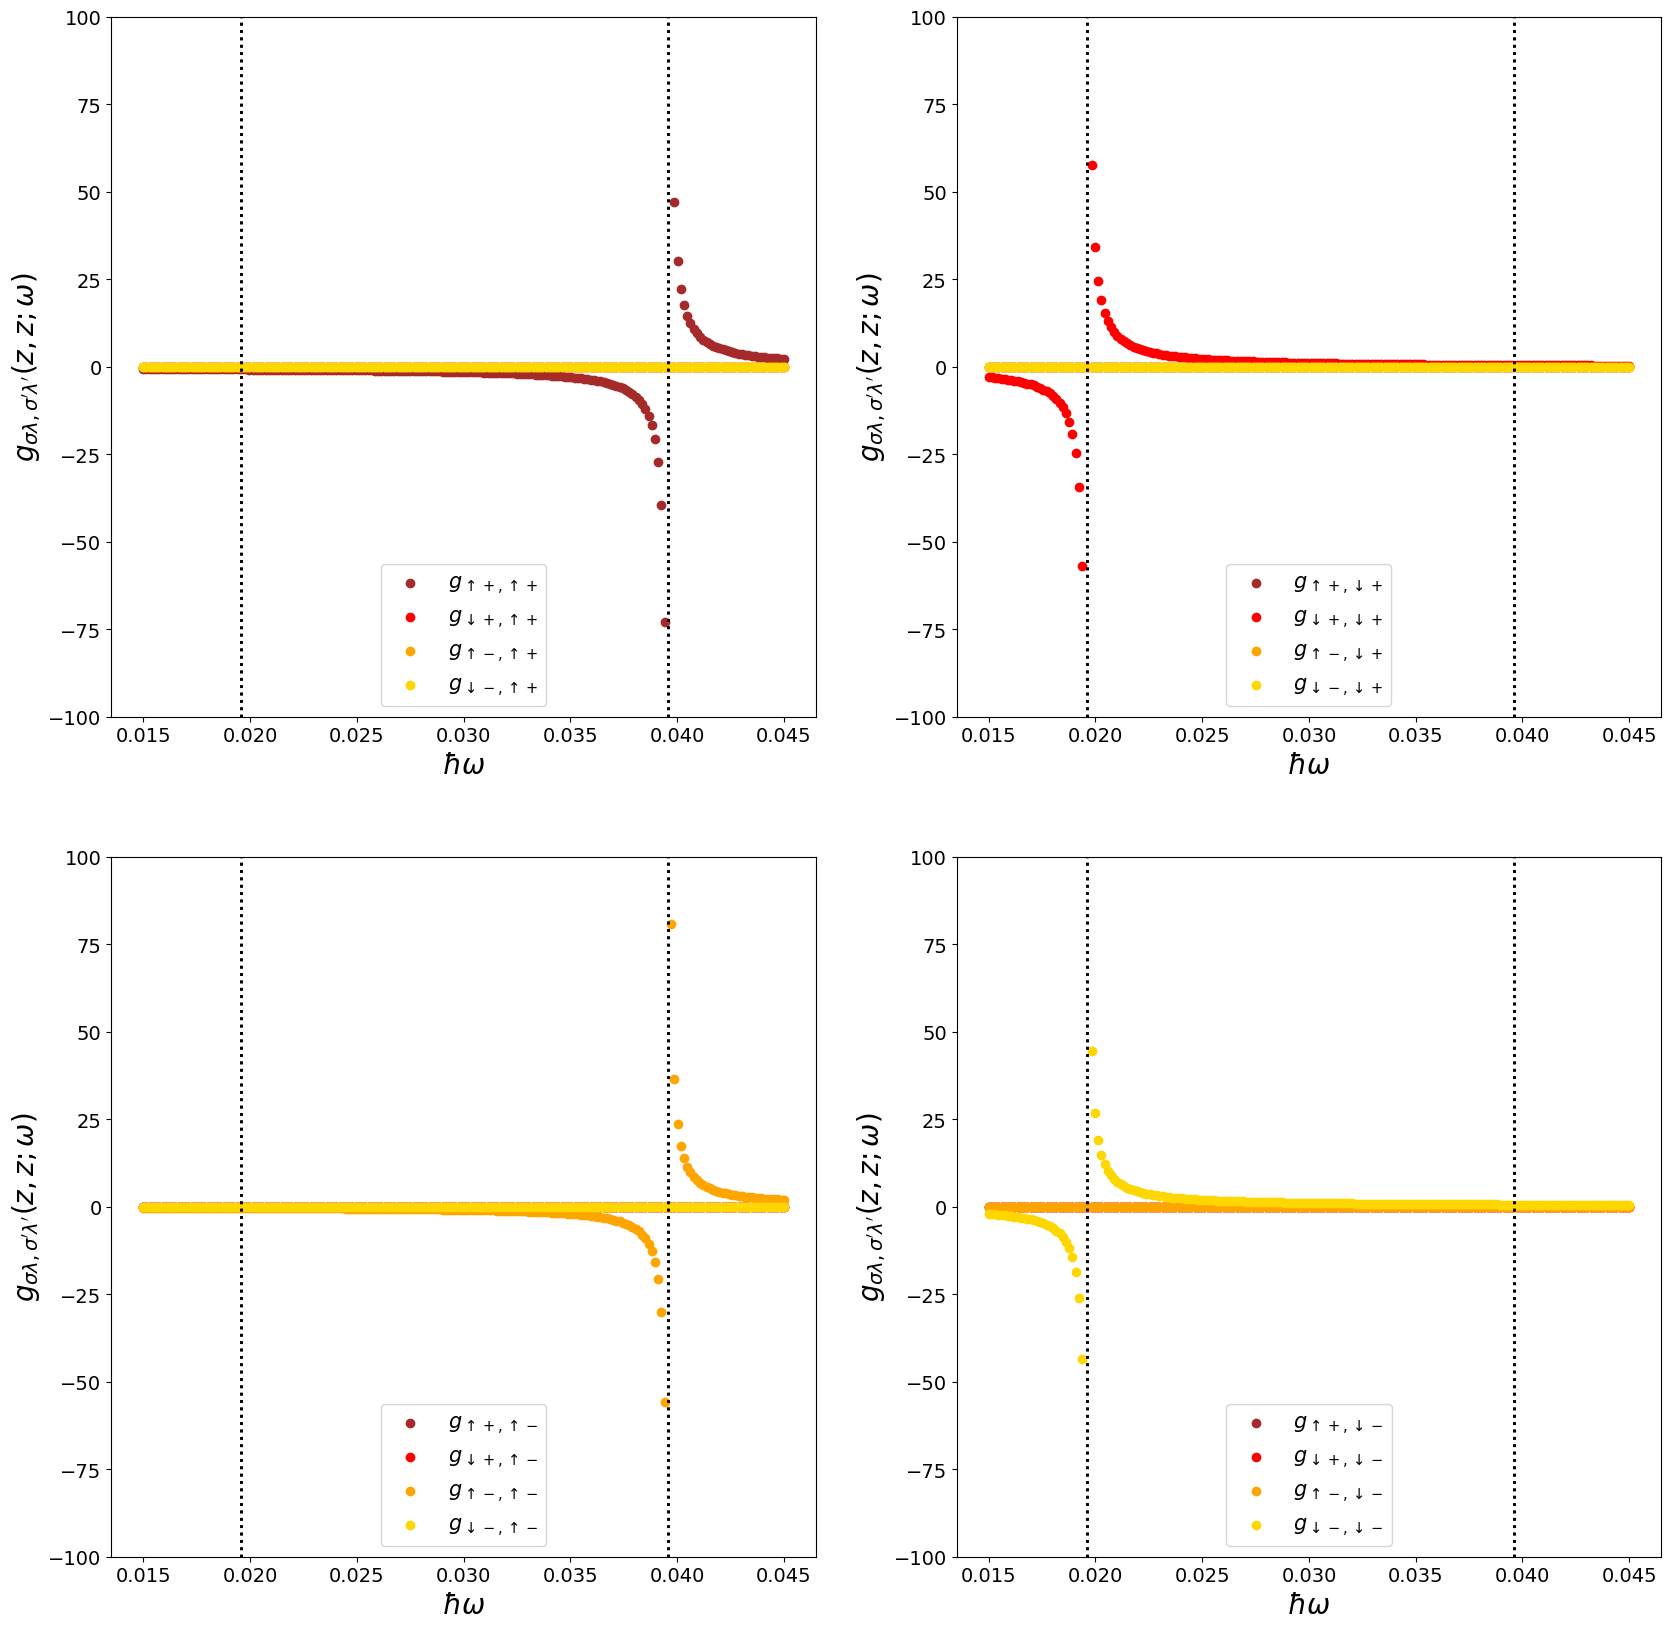

In [13]:
# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']
# labels for curves
labels = [["$g_{\\uparrow +, \\uparrow +}$", "$g_{\\uparrow +, \downarrow +}$", "$g_{\\uparrow +, \\uparrow -}$", "$g_{\\uparrow +, \downarrow -}$"],
          ["$g_{\downarrow +, \\uparrow +}$", "$g_{\downarrow +, \downarrow +}$", "$g_{\downarrow +, \\uparrow -}$", "$g_{\downarrow +, \downarrow -}$"],
          ["$g_{\\uparrow -, \\uparrow +}$", "$g_{\\uparrow -, \downarrow +}$", "$g_{\\uparrow -, \\uparrow -}$", "$g_{\\uparrow -, \downarrow -}$"],
          ["$g_{\downarrow -, \\uparrow +}$", "$g_{\downarrow -, \downarrow +}$", "$g_{\downarrow -, \\uparrow -}$", "$g_{\downarrow -, \downarrow -}$"]]



# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # plot the Green's function
        axs[iPic][jPic].scatter(energies, [gf_omega[idx][irow][icol].real for idx in range(len(energies))], c=colors[irow], label=labels[irow][icol])

    for e in egval[:4]:
        axs[iPic][jPic].axvline(x=e.real, color='black', lw=2, ls=':')

    axs[iPic][jPic].set_ylim(-100,100)
    
    axs[iPic][jPic].set_xlabel("$\hbar \omega$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 

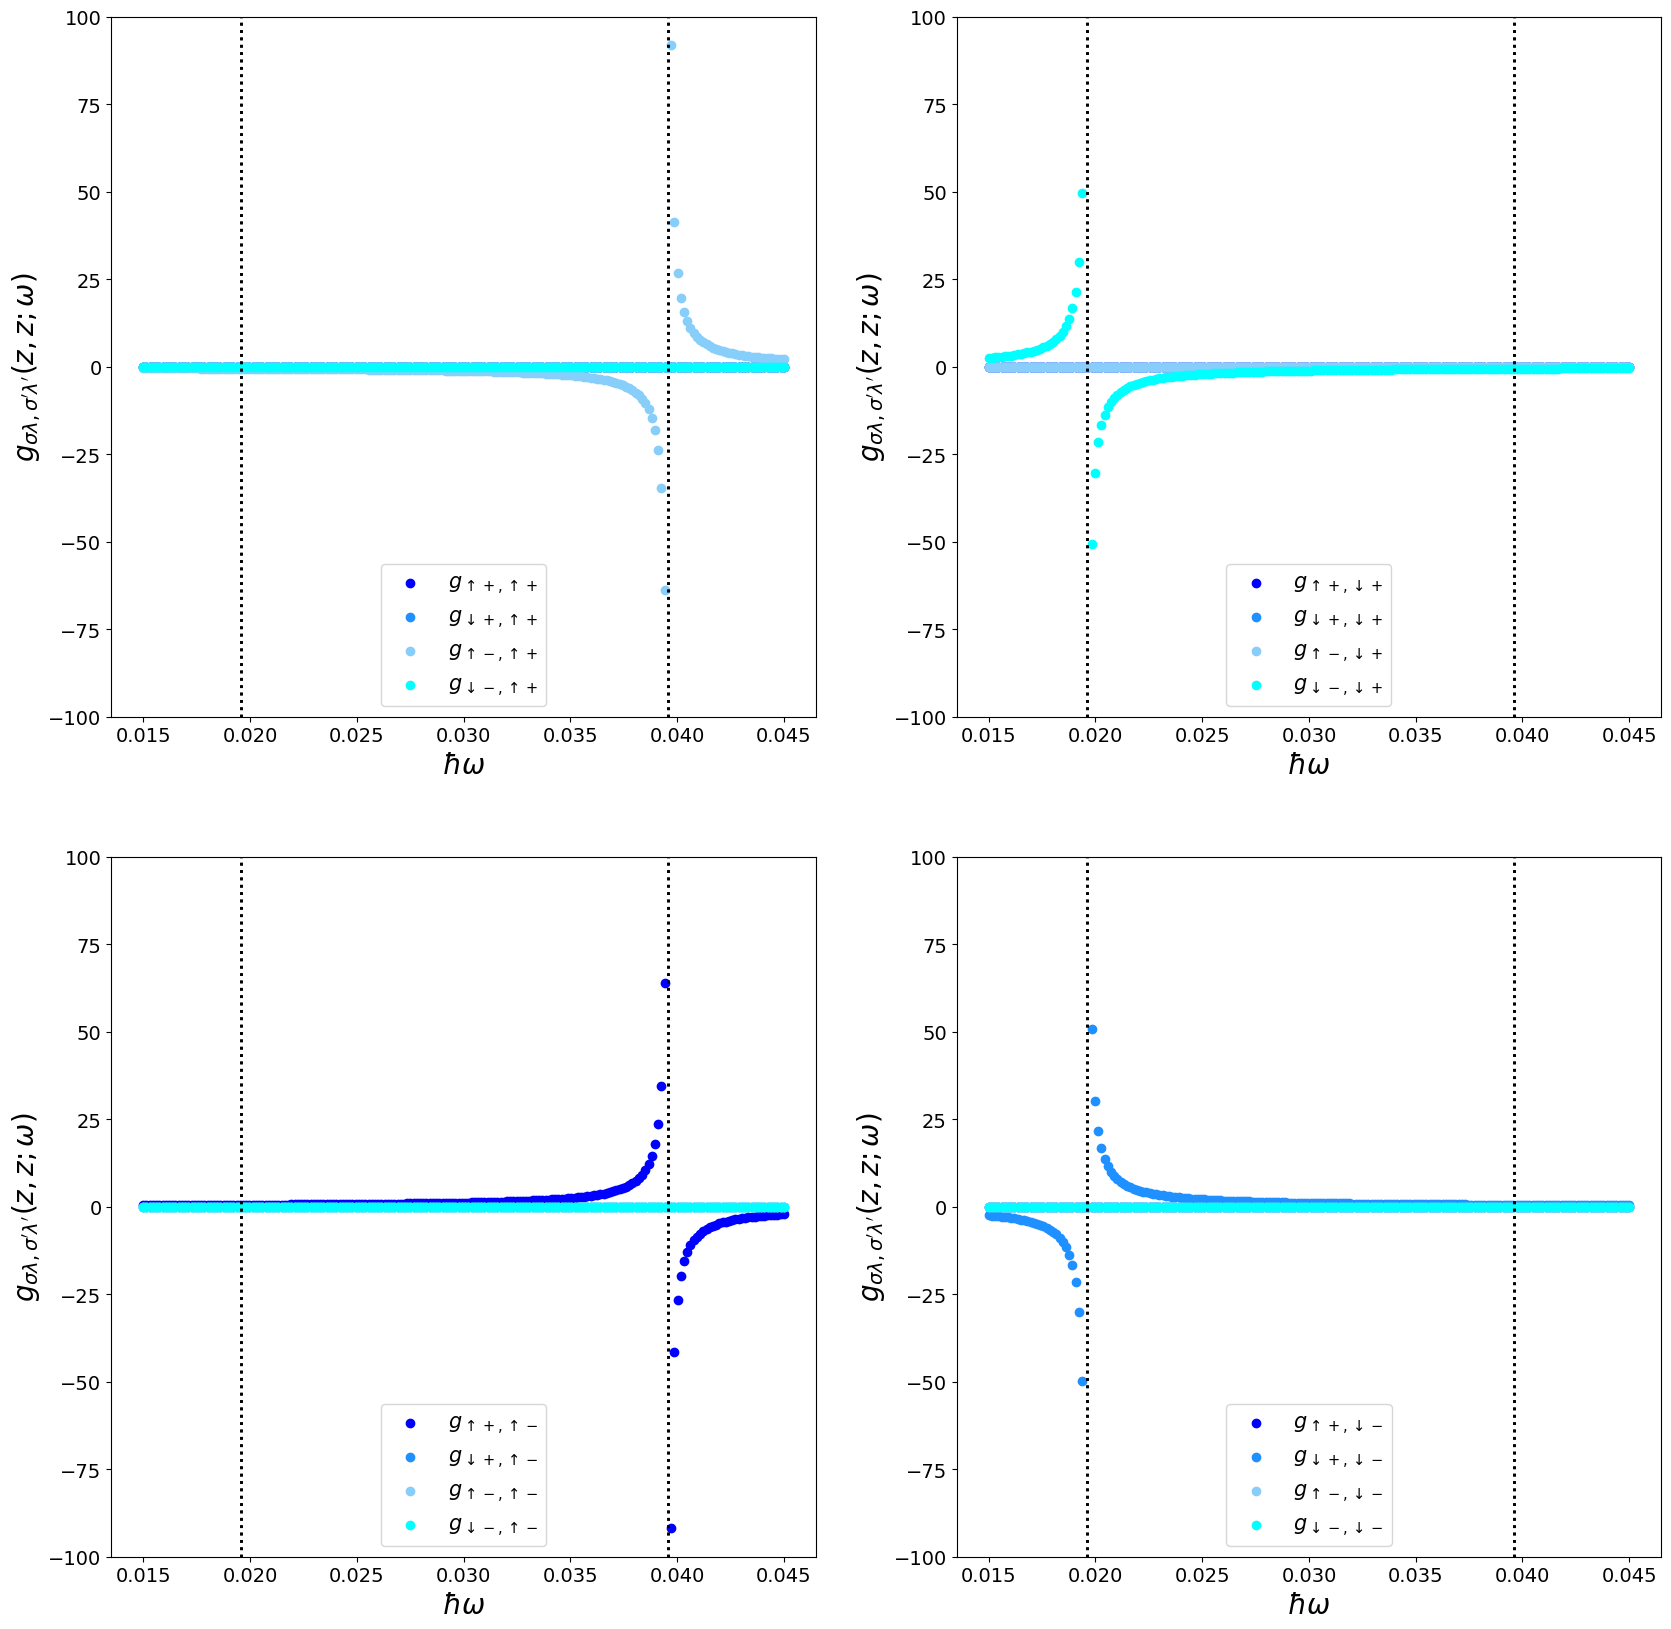

In [14]:
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']

# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        
        # plot the Green's function
        axs[iPic][jPic].scatter(energies, [gf_omega[idx][irow][icol].imag for idx in range(len(energies))], c=colors[irow], label=labels[irow][icol])


    for e in egval[:4]:
        axs[iPic][jPic].axvline(x=e.real, color='black', lw=2, ls=':')
        
    axs[iPic][jPic].set_ylim(-100,100)
    
    axs[iPic][jPic].set_xlabel("$\hbar \omega$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

### <font> Space Dependence </font> 

In [15]:
# parameters
kx = 0.; ky = 0.; L = 0.010; omega = 0.0025
# lattice
Nlat = 250; d = 100.; dZ = d/(Nlat-1); Z = np.linspace(0,d,Nlat)
# eigenstates
lattice, egval, spinors = eigenstates(Nlat=Nlat, dZ=dZ, kx=kx, ky=ky, L=L)

# compute discretized Green's function
gf_space = np.array([ GMTI_discretized(Nstates=100, egval=egval, spinors=spinors, z=z, Z=z, w=omega,  eta=1E-10) for z in range(Nlat)])
# compute GF from equation of motion
gf_Neumann = np.array([ GMTI_NeumannBC(d=d, z=z, Z=z, kx=kx, ky=ky, L=L, w=omega) for z in Z])

1000 (1000, 1000)


#### <font color='green'> **Real Part** </font> 


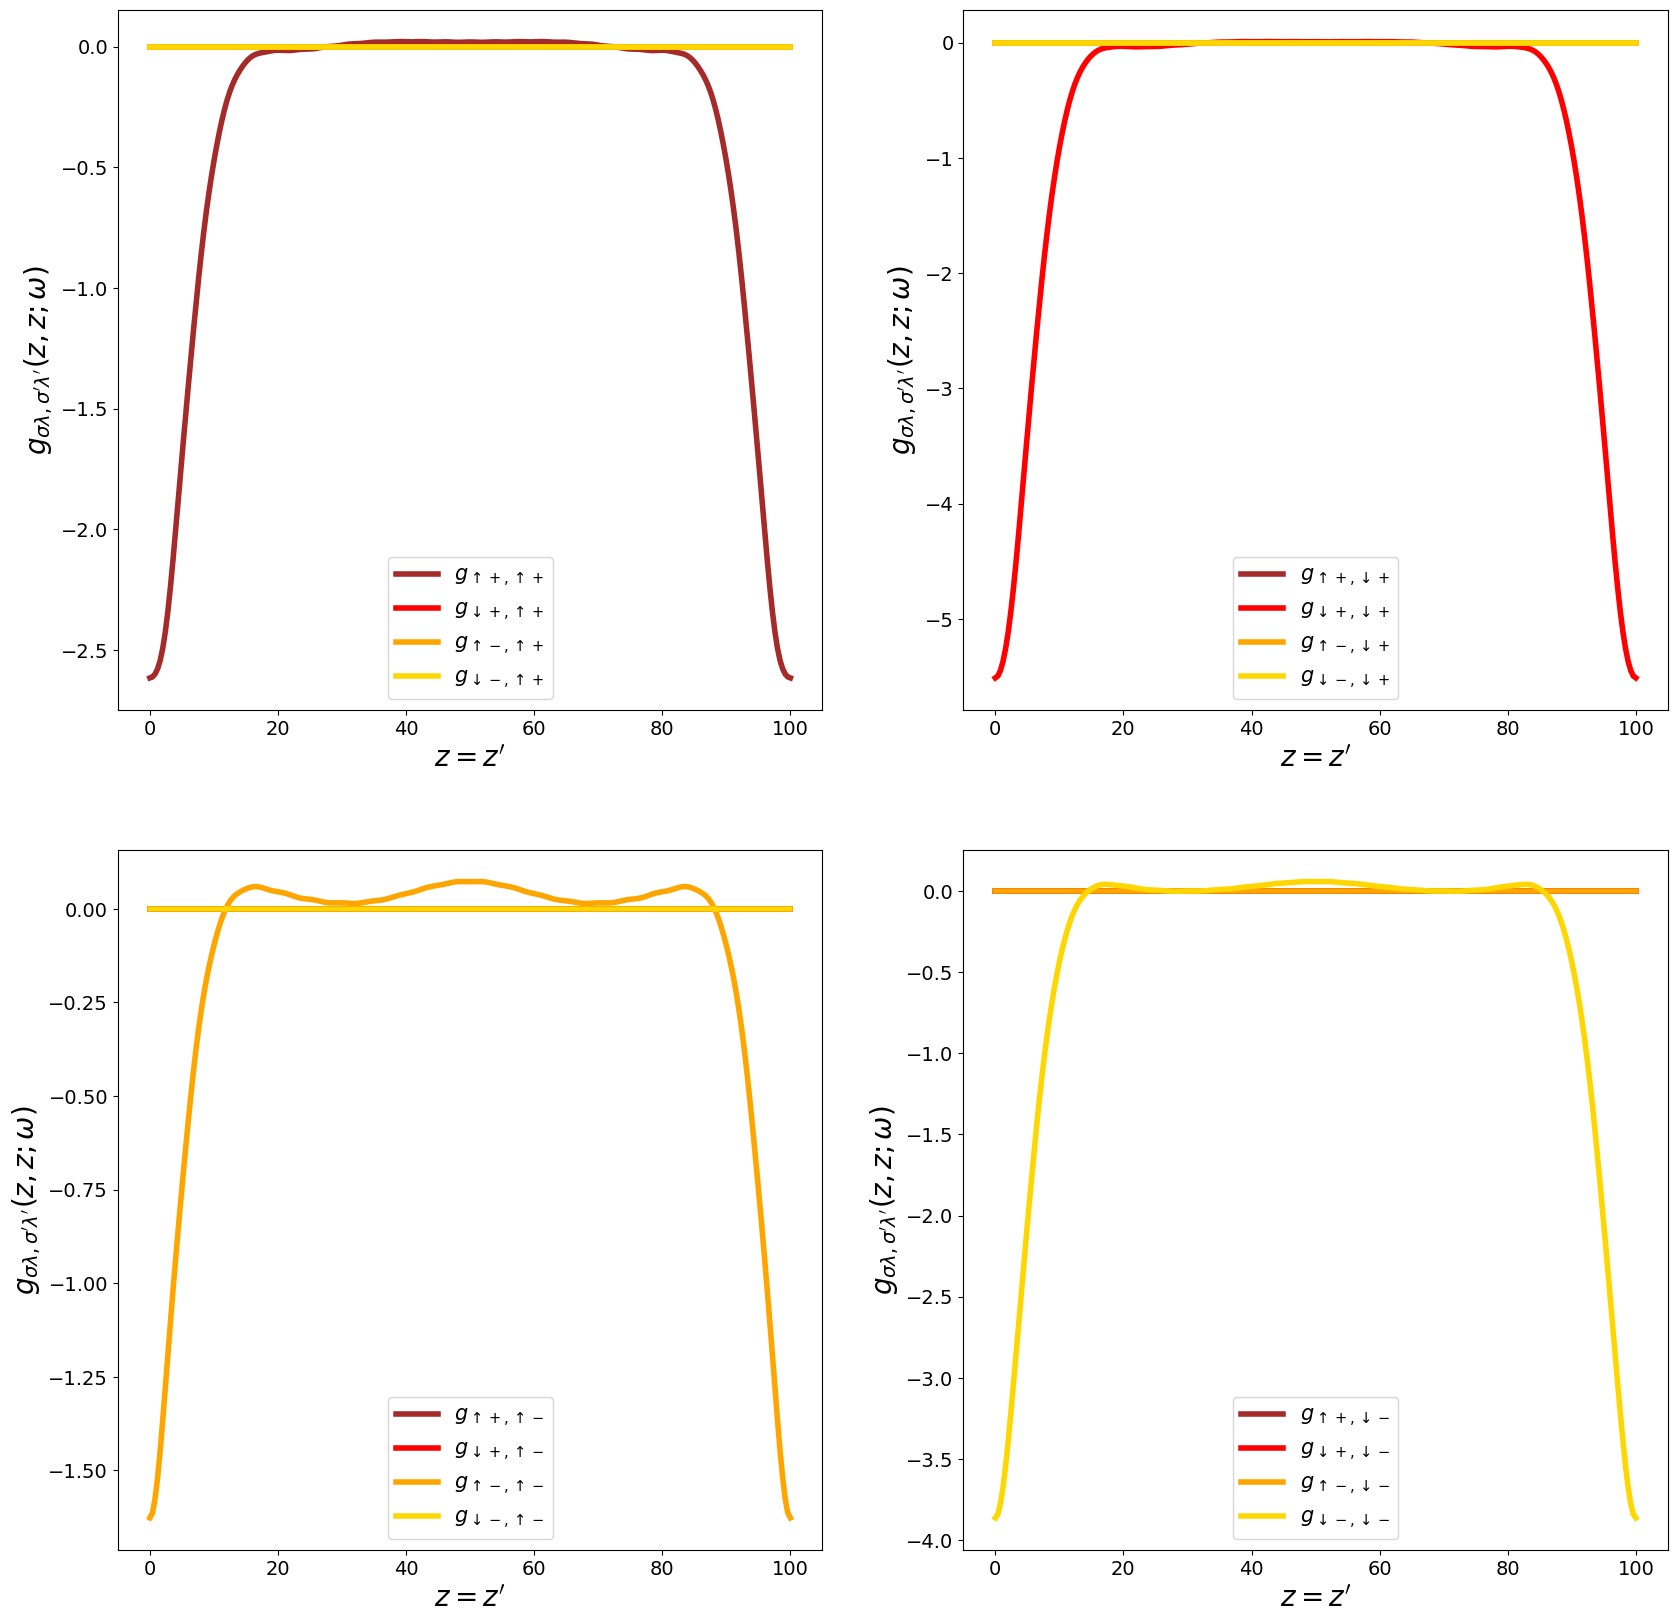

In [16]:
# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot discretized results
        axs[iPic][jPic].plot(lattice, [gf_space[idx][irow][icol].real for idx in range(Nlat)], c=colors[irow], lw=4, label=labels[irow][icol] )

    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 


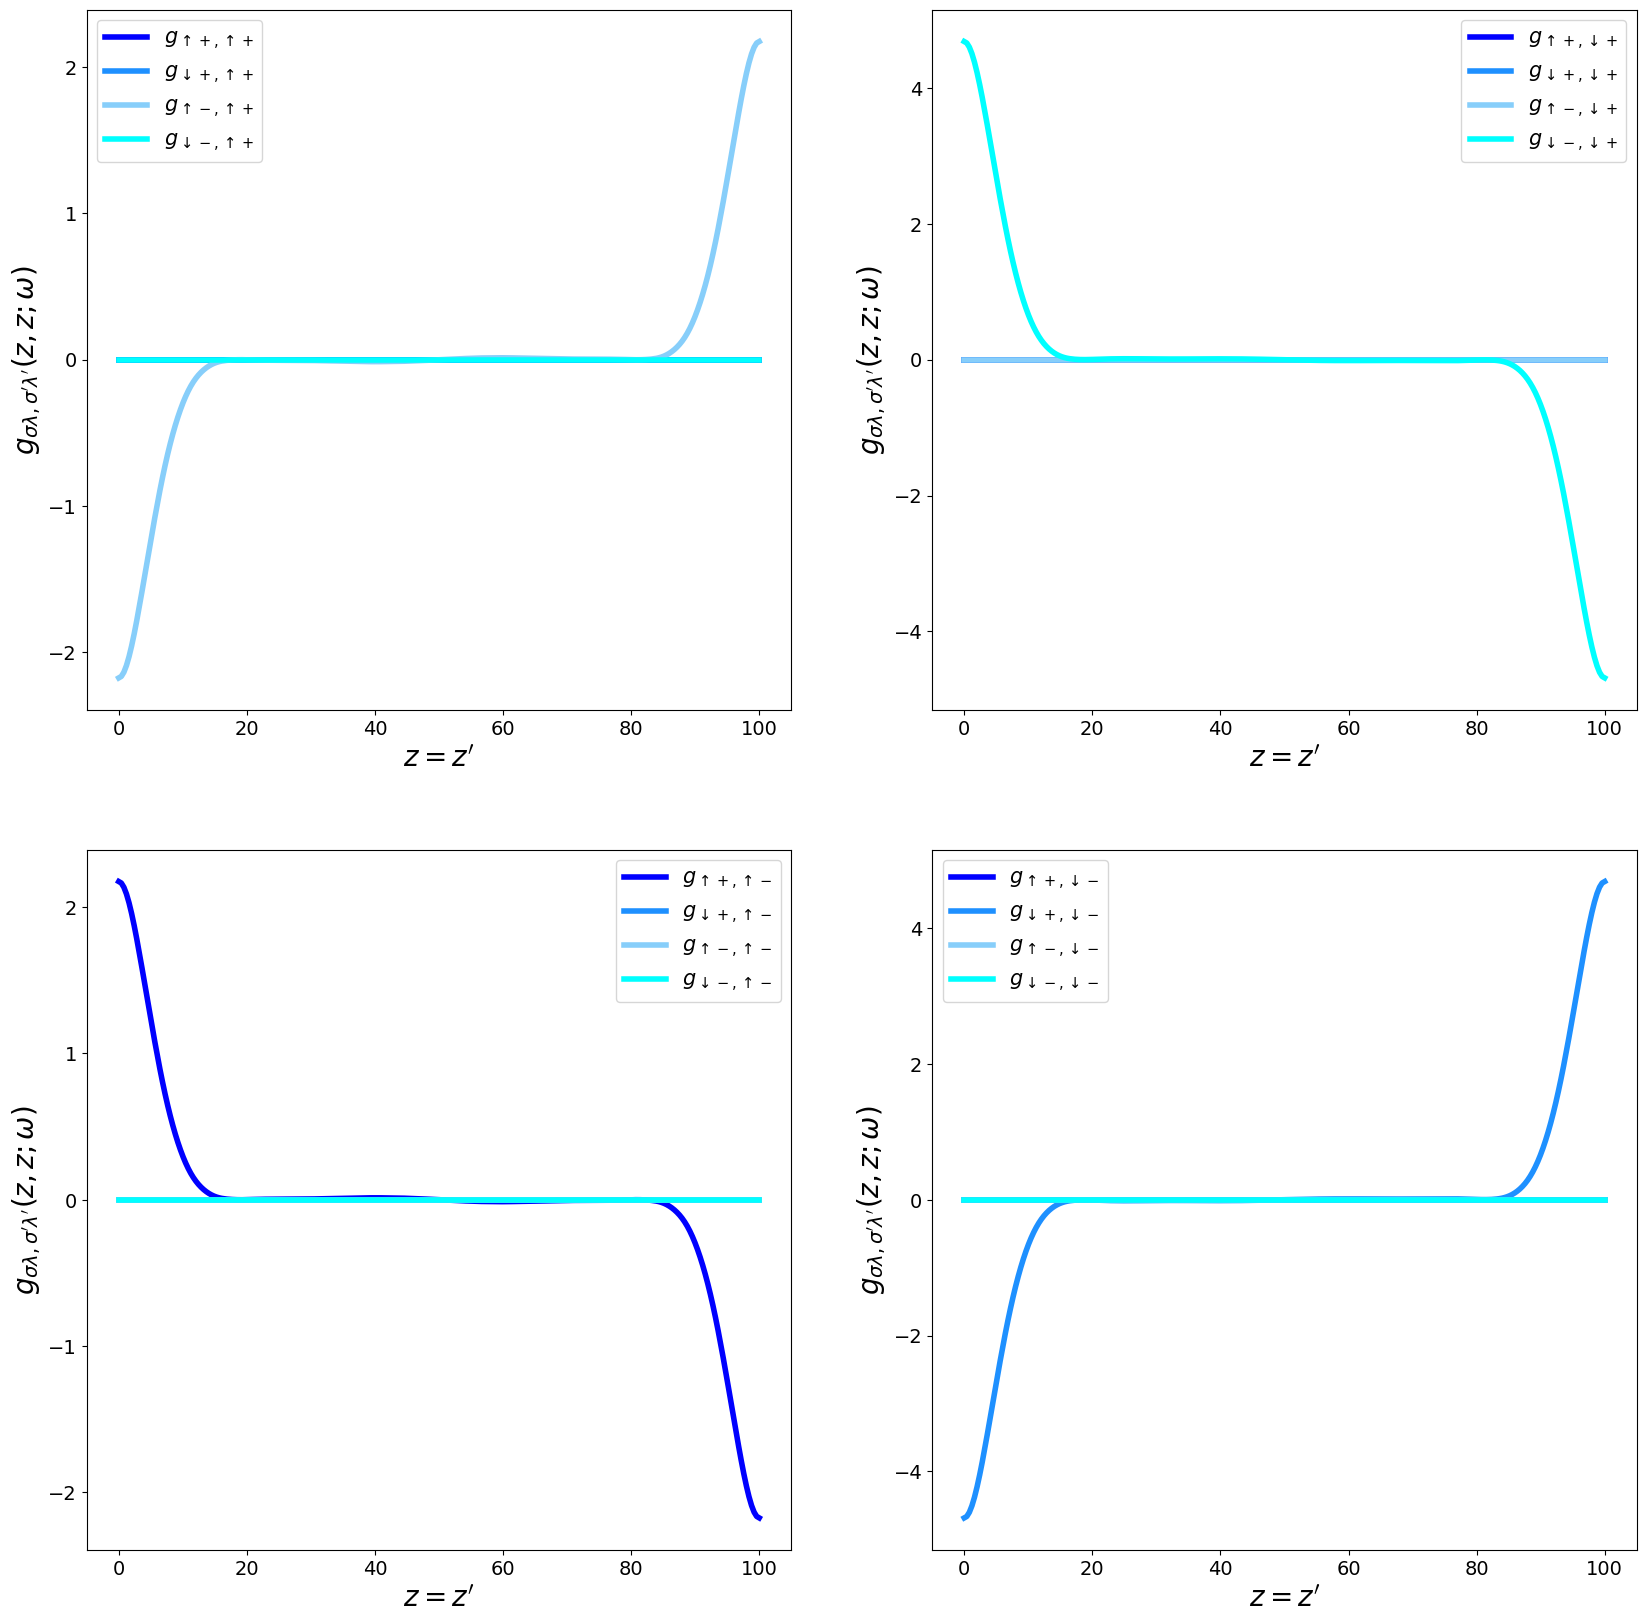

In [17]:
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot approximate results
        axs[iPic][jPic].plot(lattice, [gf_space[idx][irow][icol].imag for idx in range(Nlat)], c=colors[irow], lw=4, label=labels[irow][icol] )
            
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);